<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>Assignment - 3: Vectorization</h2>

<h3 style = 'color:lightgreen'>0. Import Libraries</h3>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import OrderedDict

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import nltk
from collections import Counter

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

<h3 style = 'color:lightgreen'>1. Load Text/Data</h3>

In [39]:
textRJ = open("../0. Data/RomeoJuliet.txt", "r").read()
blobRJ = TextBlob(textRJ)

textH = open("../0. Data/Hamlet.txt", "r").read()
blobH = TextBlob(textH)

<h3 style = 'color:lightgreen'>2. Assignment</h3>
<h3 style = 'color:green'>2.1 Compute and Plot Normalized Vectors</h3>

In [4]:
A = np.array([3, 7])
B = np.array([5, 36])
C = np.array([7, 29])
D = np.array([212, 72])
E = np.array([23, 2])

In [5]:
# Calculate Normalized Vectors
A_norm = A / np.linalg.norm(A)
B_norm = B / np.linalg.norm(B)
C_norm = C / np.linalg.norm(C)
D_norm = D / np.linalg.norm(D)
E_norm = E / np.linalg.norm(E)

In [7]:
df_normalized_vectors = pd.DataFrame({
    '0': [A[0], B[0], C[0], D[0], E[0]],
    '1': [A[1], B[1], C[1], D[1], E[1]],
    'Normalized': [A_norm, B_norm, C_norm, D_norm, E_norm]
})
df_normalized_vectors.index = ['A', 'B', 'C', 'D', 'E']
df_normalized_vectors

,0,1,Normalized
A,3,7,"[0.39391929857916763, 0.9191450300180578]"
B,5,36,"[0.13756837127468774, 0.9904922731777517]"
C,7,29,"[0.23464053310389682, 0.9720822085732868]"
D,212,72,"[0.9468815887204546, 0.3215824263578902]"
E,23,2,"[0.996240588195683, 0.086629616364842]"


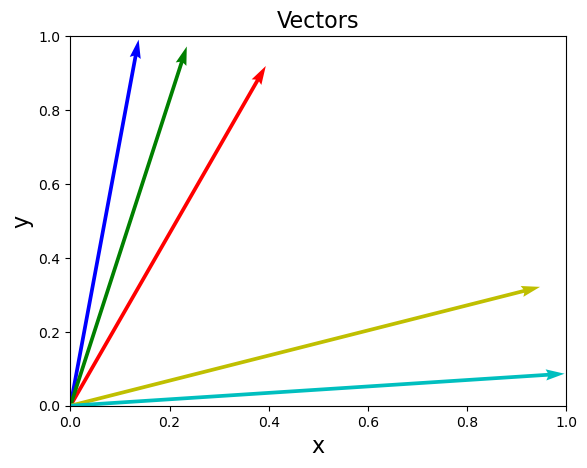

In [26]:
# Plot Vectors
x1 = A_norm[0]; x2 = B_norm[0]; x3 = C_norm[0]; x4 = D_norm[0]; x5 = E_norm[0]
y1 = A_norm[1]; y2 = B_norm[1]; y3 = C_norm[1]; y4 = D_norm[1]; y5 = E_norm[1] 

# Plot two vectors from 0, 0 to x1, y1 and x2, y2
QV1 = plt.quiver([0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], angles='xy', scale_units='xy', scale=1, color=['r', 'b', 'g', 'y', 'c'])

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Vectors', fontsize=16)
plt.show()

<h3 style = 'color:green'>2.2 Compute Distances - Euclidean, Manhattan, and Cosine (Similarity and Distance)</h3>

In [12]:
def compute_distances(A, B):
    euclidean = np.linalg.norm(A - B)
    manhattan = np.sum(np.abs(A - B))
    cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
    cosine_distance = 1 - cosine_similarity
    return euclidean, manhattan, cosine_similarity, cosine_distance

In [13]:
compute_distances(A_norm, B_norm)

(0.2660943949735793,
 0.32769817046417377,
 0.9645968864818225,
 0.03540311351817749)

In [20]:
df_distances_from_A = pd.DataFrame({
    'Euclidean': [compute_distances(A_norm, B_norm)[0], compute_distances(A_norm, C_norm)[0], compute_distances(A_norm, D_norm)[0], compute_distances(A_norm, E_norm)[0]],
    'Manhattan': [compute_distances(A_norm, B_norm)[1], compute_distances(A_norm, C_norm)[1], compute_distances(A_norm, D_norm)[1], compute_distances(A_norm, E_norm)[1]],
    'Cosine Similarity': [compute_distances(A_norm, B_norm)[2], compute_distances(A_norm, C_norm)[2], compute_distances(A_norm, D_norm)[2], compute_distances(A_norm, E_norm)[2]],
    'Cosine Distance': [compute_distances(A_norm, B_norm)[3], compute_distances(A_norm, C_norm)[3], compute_distances(A_norm, D_norm)[3], compute_distances(A_norm, E_norm)[3]]
})
df_distances_from_A.index = ['B', 'C', 'D', 'E']
df_distances_from_A

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
B,0.266094,0.327698,0.964597,0.035403
C,0.167845,0.212216,0.985914,0.014086
D,0.814155,1.150525,0.668576,0.331424
E,1.027557,1.434837,0.472064,0.527936


In [21]:
df_distances_from_B = pd.DataFrame({
    'Euclidean': [compute_distances(B_norm, A_norm)[0], compute_distances(B_norm, C_norm)[0], compute_distances(B_norm, D_norm)[0], compute_distances(B_norm, E_norm)[0]],
    'Manhattan': [compute_distances(B_norm, A_norm)[1], compute_distances(B_norm, C_norm)[1], compute_distances(B_norm, D_norm)[1], compute_distances(B_norm, E_norm)[1]],
    'Cosine Similarity': [compute_distances(B_norm, A_norm)[2], compute_distances(B_norm, C_norm)[2], compute_distances(B_norm, D_norm)[2], compute_distances(B_norm, E_norm)[2]],
    'Cosine Distance': [compute_distances(B_norm, A_norm)[3], compute_distances(B_norm, C_norm)[3], compute_distances(B_norm, D_norm)[3], compute_distances(B_norm, E_norm)[3]]
})
df_distances_from_B.index = ['A', 'C', 'D', 'E']
df_distances_from_B

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
A,0.266094,0.327698,0.964597,0.035403
C,0.098803,0.115482,0.995119,0.004881
D,1.049966,1.478223,0.448786,0.551214
E,1.246710,1.762535,0.222857,0.777143


In [22]:
df_distances_from_C = pd.DataFrame({
    'Euclidean': [compute_distances(C_norm, A_norm)[0], compute_distances(C_norm, B_norm)[0], compute_distances(C_norm, D_norm)[0], compute_distances(C_norm, E_norm)[0]],
    'Manhattan': [compute_distances(C_norm, A_norm)[1], compute_distances(C_norm, B_norm)[1], compute_distances(C_norm, D_norm)[1], compute_distances(C_norm, E_norm)[1]],
    'Cosine Similarity': [compute_distances(C_norm, A_norm)[2], compute_distances(C_norm, B_norm)[2], compute_distances(C_norm, D_norm)[2], compute_distances(C_norm, E_norm)[2]],
    'Cosine Distance': [compute_distances(C_norm, A_norm)[3], compute_distances(C_norm, B_norm)[3], compute_distances(C_norm, D_norm)[3], compute_distances(C_norm, E_norm)[3]]
})
df_distances_from_C.index = ['A', 'B', 'D', 'E']
df_distances_from_C

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
A,0.167845,0.212216,0.985914,0.014086
B,0.098803,0.115482,0.995119,0.004881
D,0.964592,1.362741,0.534781,0.465219
E,1.167930,1.647053,0.317970,0.682030


In [23]:
df_distances_from_D = pd.DataFrame({
    'Euclidean': [compute_distances(D_norm, A_norm)[0], compute_distances(D_norm, B_norm)[0], compute_distances(D_norm, C_norm)[0], compute_distances(D_norm, E_norm)[0]],
    'Manhattan': [compute_distances(D_norm, A_norm)[1], compute_distances(D_norm, B_norm)[1], compute_distances(D_norm, C_norm)[1], compute_distances(D_norm, E_norm)[1]],
    'Cosine Similarity': [compute_distances(D_norm, A_norm)[2], compute_distances(D_norm, B_norm)[2], compute_distances(D_norm, C_norm)[2], compute_distances(D_norm, E_norm)[2]],
    'Cosine Distance': [compute_distances(D_norm, A_norm)[3], compute_distances(D_norm, B_norm)[3], compute_distances(D_norm, C_norm)[3], compute_distances(D_norm, E_norm)[3]]
})
df_distances_from_D.index = ['A', 'B', 'C', 'E']
df_distances_from_D

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
A,0.814155,1.150525,0.668576,0.331424
B,1.049966,1.478223,0.448786,0.551214
C,0.964592,1.362741,0.534781,0.465219
E,0.240082,0.284312,0.971180,0.028820


In [70]:
df_distances_from_E = pd.DataFrame({
    'Euclidean': [compute_distances(E_norm, A_norm)[0], compute_distances(E_norm, B_norm)[0], compute_distances(E_norm, C_norm)[0], compute_distances(E_norm, D_norm)[0]],
    'Manhattan': [compute_distances(E_norm, A_norm)[1], compute_distances(E_norm, B_norm)[1], compute_distances(E_norm, C_norm)[1], compute_distances(E_norm, D_norm)[1]],
    'Cosine Similarity': [compute_distances(E_norm, A_norm)[2], compute_distances(E_norm, B_norm)[2], compute_distances(E_norm, C_norm)[2], compute_distances(E_norm, D_norm)[2]],
    'Cosine Distance': [compute_distances(E_norm, A_norm)[3], compute_distances(E_norm, B_norm)[3], compute_distances(E_norm, C_norm)[3], compute_distances(E_norm, D_norm)[3]]
})
df_distances_from_E.index = ['A', 'B', 'C', 'D']
df_distances_from_E

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
A,1.027557,1.434837,0.472064,0.527936
B,1.246710,1.762535,0.222857,0.777143
C,1.167930,1.647053,0.317970,0.682030
D,0.240082,0.284312,0.971180,0.028820


<h3 style = 'color:green'>2.3 Compute Distances from Search Query</h3>

In [28]:
query_vector = np.array([4, 23])
query_vector_norm = query_vector / np.linalg.norm(query_vector)

df_distances_from_query = pd.DataFrame({
    'Euclidean': [compute_distances(query_vector_norm, A_norm)[0], compute_distances(query_vector_norm, B_norm)[0], compute_distances(query_vector_norm, C_norm)[0], compute_distances(query_vector_norm, D_norm)[0], compute_distances(query_vector_norm, E_norm)[0]],
    'Manhattan': [compute_distances(query_vector_norm, A_norm)[1], compute_distances(query_vector_norm, B_norm)[1], compute_distances(query_vector_norm, C_norm)[1], compute_distances(query_vector_norm, D_norm)[1], compute_distances(query_vector_norm, E_norm)[1]],
    'Cosine Similarity': [compute_distances(query_vector_norm, A_norm)[2], compute_distances(query_vector_norm, B_norm)[2], compute_distances(query_vector_norm, C_norm)[2], compute_distances(query_vector_norm, D_norm)[2], compute_distances(query_vector_norm, E_norm)[2]],
    'Cosine Distance': [compute_distances(query_vector_norm, A_norm)[3], compute_distances(query_vector_norm, B_norm)[3], compute_distances(query_vector_norm, C_norm)[3], compute_distances(query_vector_norm, D_norm)[3], compute_distances(query_vector_norm, E_norm)[3]]
})
df_distances_from_query.index = ['A', 'B', 'C', 'D', 'E']
df_distances_from_query

,Euclidean,Manhattan,Cosine Similarity,Cosine Distance
A,0.232176,0.288645,0.973047,0.026953
B,0.034183,0.039053,0.999416,0.000584
C,0.064647,0.076429,0.997910,0.002090
D,1.020719,1.439170,0.479067,0.520933
E,1.219799,1.723482,0.256046,0.743954


In [29]:
# Find the closest vector to the query vector using Cosine Distance
closest_vector = df_distances_from_query['Cosine Distance'].idxmin()
closest_vector

'B'

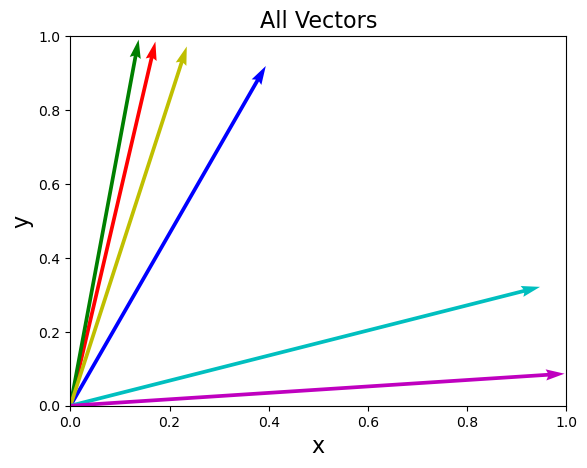

In [34]:
# Plot Vectors
x1 = query_vector_norm[0]; x2 = A_norm[0]; x3 = B_norm[0]; x4 = C_norm[0]; x5 = D_norm[0]; x6 = E_norm[0]
y1 = query_vector_norm[1]; y2 = A_norm[1]; y3 = B_norm[1]; y4 = C_norm[1]; y5 = D_norm[1]; y6 = E_norm[1] 

# Plot two vectors from 0, 0 to x1, y1 and x2, y2
QV1 = plt.quiver([0, 0, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, 0], 
                 [x1, x2, x3, x4, x5, x6], 
                 [y1, y2, y3, y4, y5, y6], 
                 angles='xy', 
                 scale_units='xy', 
                 scale=1, 
                 color=['r', 'b', 'g', 'y', 'c', 'm'])

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('All Vectors', fontsize=16)
plt.show()

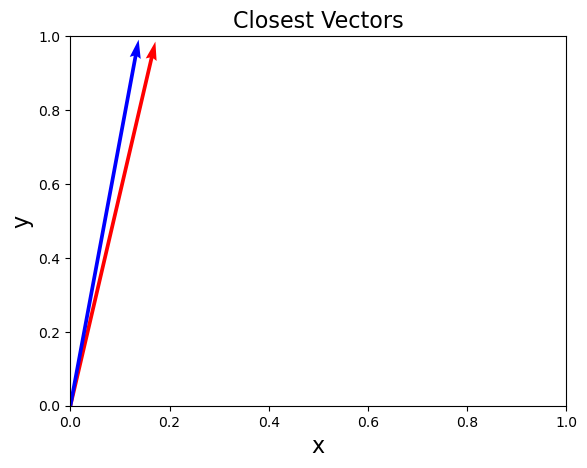

In [33]:
# Plot Closest Vector and Search Query Vector
x1 = query_vector_norm[0]; x2 = B_norm[0]
y1 = query_vector_norm[1]; y2 = B_norm[1]

# Plot two vectors from 0, 0 to x1, y1 and x2, y2
QV1 = plt.quiver([0, 0], 
                 [0, 0], 
                 [x1, x2], 
                 [y1, y2], 
                 angles='xy', 
                 scale_units='xy', 
                 scale=1, 
                 color=['r', 'b'])

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Closest Vectors', fontsize=16)
plt.show()

<h3 style = 'color:green'>2.4 Zipf's Law</h3>

In [42]:
puncs = [',', '.', '``', "''", ':', ';', '?', '(', ')', '[', ']', '--', '&', '!', '*', '@', '#', '$', '%', '...']

In [44]:
word_list_H = [word.lower() for word in blobH.words if word not in puncs and '_' not in word and ' ' not in word]
word_list_RJ = [word.lower() for word in blobRJ.words if word not in puncs and '_' not in word and ' ' not in word]

In [51]:
token_counts_H = Counter(word_list_H)
token_counts_RJ = Counter(word_list_RJ)

print(token_counts_H.most_common(10))
print(token_counts_RJ.most_common(10))

[('the', 1302), ('’', 1068), ('and', 1053), ('to', 827), ('of', 800), ('you', 632), ('i', 630), ('a', 610), ('in', 527), ('my', 516)]
[('the', 876), ('’', 869), ('and', 808), ('i', 655), ('to', 626), ('a', 542), ('of', 519), ('in', 395), ('is', 372), ('that', 369)]


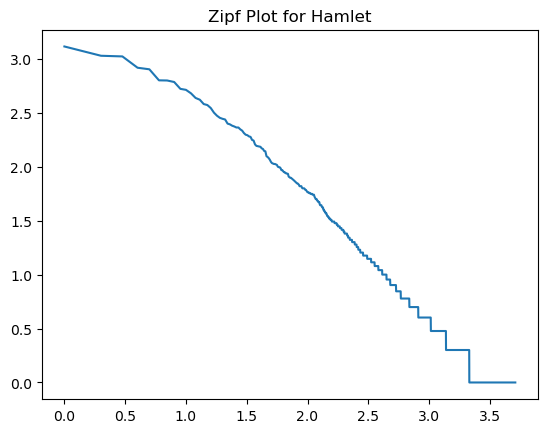

In [52]:
sorted_token_counts = OrderedDict(sorted(token_counts_H.items(), key= lambda x: x[1], reverse=True))
frequency_vector = np.array(list(sorted_token_counts.values()))
rank = np.arange(1, len(frequency_vector) + 1)

plt.clf()
plt.title('Zipf Plot for Hamlet')
plt.plot(np.log10(rank), np.log10(frequency_vector))

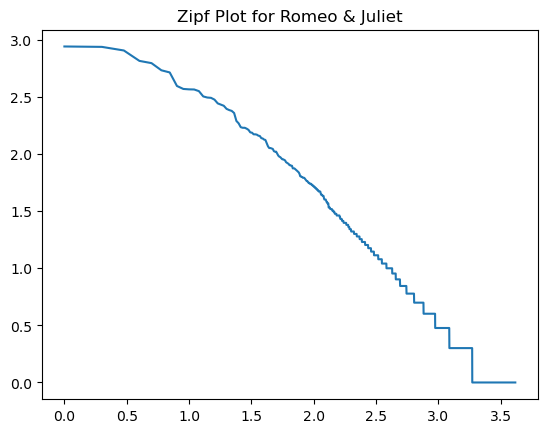

In [53]:
sorted_token_counts = OrderedDict(sorted(token_counts_RJ.items(), key= lambda x: x[1], reverse=True))
frequency_vector = np.array(list(sorted_token_counts.values()))
rank = np.arange(1, len(frequency_vector) + 1)

plt.clf()
plt.title('Zipf Plot for Romeo & Juliet')
plt.plot(np.log10(rank), np.log10(frequency_vector))

<h3 style = 'color:green'>2.5 TF-IDF Vectors</h3>

The Scikit-Learn implementation of TF-IDF is used to compute the TF-IDF vectors for each document. By default, the data is normalized using the L2-norm. This calculation is missing when calculating the TF-IDF manually.

In the following example, I have normalized the calculation.

In [59]:
doc_1 = "disneyland is in orange county"
doc_2 = "orange county disneyland is better than orlando disneyland"
corpus = [doc_1, doc_2]
corpus

['disneyland is in orange county',
 'orange county disneyland is better than orlando disneyland']

In [60]:
# Compute Standard TF-IDF values

# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(corpus)

In [64]:
df = np.sum(X.toarray() > 0, axis=0)
df

array([1, 2, 2, 2, 1])

In [66]:
tf = X.toarray()
idf = np.log10(len(corpus) / df) + 1

In [67]:
tfidf_manual = tf * idf
tfidf_manual_normalized = tfidf_manual / np.linalg.norm(tfidf_manual)
tfidf_manual_normalized

array([[0.        , 0.28414873, 0.28414873, 0.28414873, 0.        ],
       [0.36968602, 0.28414873, 0.56829746, 0.28414873, 0.36968602]])

In [69]:
# Using scikit-learn's TfidfTransformer
transformer = TfidfTransformer()
tfidf_sklearn = transformer.fit_transform(X)
tfidf_sklearn_array = tfidf_sklearn.toarray()
tfidf_sklearn_array

array([[0.        , 0.57735027, 0.57735027, 0.57735027, 0.        ],
       [0.44554752, 0.31701073, 0.63402146, 0.31701073, 0.44554752]])